In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2015-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())

In [3]:
log_returns.tail()

,PG
Date,
2020-05-01,-0.008948
2020-05-04,-0.009029
2020-05-05,0.002071
2020-05-06,-0.025404
2020-05-07,-0.004342


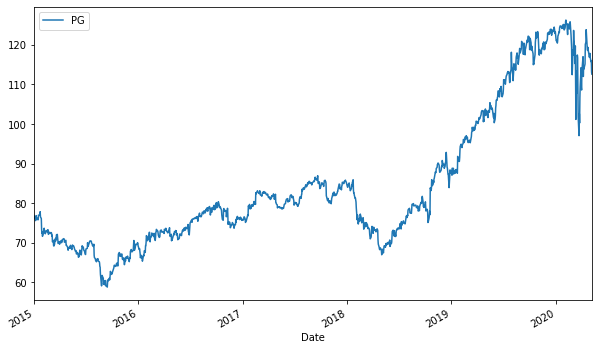

In [4]:
data.plot(figsize=(10, 6));

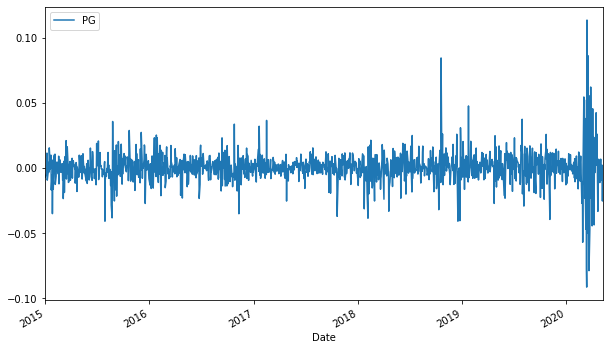

In [5]:
log_returns.plot(figsize = (10, 6))

In [6]:
u = log_returns.mean()
u

PG    0.000284
dtype: float64

In [7]:
var = log_returns.var()
var

PG    0.000155
dtype: float64

In [8]:
drift = u - (0.5 * var)
drift

PG    0.000206
dtype: float64

In [9]:
stdev = log_returns.std()
stdev

PG    0.012454
dtype: float64

******

In [10]:
type(drift)

pandas.core.series.Series

In [11]:
type(stdev)

pandas.core.series.Series

In [12]:
np.array(drift)

array([0.00020649])

In [13]:
drift.values

array([0.00020649])

In [14]:
stdev.values

array([0.01245373])

In [15]:
norm.ppf(0.95)

1.6448536269514722

In [16]:
x = np.random.rand(10, 2)
x

array([[0.54554486, 0.22293696],
       [0.98043491, 0.65234013],
       [0.85586844, 0.17566869],
       [0.02135366, 0.66057295],
       [0.87896722, 0.23955236],
       [0.12538529, 0.52233615],
       [0.8806419 , 0.15436738],
       [0.06982614, 0.15826672],
       [0.073582  , 0.32805444],
       [0.47376404, 0.00310991]])

In [17]:
norm.ppf(x)

array([[ 0.11441316, -0.76231181],
       [ 2.06281539,  0.39164607],
       [ 1.06193956, -0.93199834],
       [-2.026561  ,  0.41402732],
       [ 1.16983953, -0.70774325],
       [-1.14847974,  0.05601771],
       [ 1.17820171, -1.01788049],
       [-1.47708712, -1.001607  ],
       [-1.44962183, -0.44529182],
       [-0.06581127, -2.7359618 ]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-1.6414662 , -1.09317164],
       [-0.30844104,  0.5684396 ],
       [ 1.68922115, -1.29290532],
       [-0.17261625, -0.21612928],
       [-1.91688589,  0.8216546 ],
       [-0.6900274 , -1.28078364],
       [-0.08096859, -0.37191476],
       [-0.30288064,  1.33937023],
       [ 0.76400755, -0.43657557],
       [-0.19646004, -1.46535244]])

In [19]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [20]:
daily_returns

array([[0.99830262, 1.00406643, 0.97917572, ..., 0.99645308, 0.97405112,
        0.99274469],
       [0.992642  , 1.00548692, 1.01381598, ..., 0.9787852 , 1.01518584,
        0.99229273],
       [1.00065091, 1.00467327, 0.98972534, ..., 1.00489908, 1.00738095,
        0.99358756],
       ...,
       [0.98594203, 1.00649944, 1.01024918, ..., 0.99382441, 0.98434611,
        0.99275726],
       [1.01360801, 1.01478118, 1.00023492, ..., 0.9984046 , 1.00289257,
        0.98995898],
       [0.98933932, 1.00369002, 1.00097924, ..., 0.9852448 , 0.999117  ,
        1.0093855 ]])

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [21]:
S0 = data.iloc[-1]
S0

PG    112.610001
Name: 2020-05-07 00:00:00, dtype: float64

In [22]:
price_list = np.zeros_like(daily_returns)

In [23]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
price_list[0] = S0
price_list

array([[112.61000061, 112.61000061, 112.61000061, ..., 112.61000061,
        112.61000061, 112.61000061],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [26]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [27]:
price_list

array([[112.61000061, 112.61000061, 112.61000061, ..., 112.61000061,
        112.61000061, 112.61000061],
       [111.78141634, 113.22788256, 114.16581814, ..., 110.22100211,
        114.32007812, 111.7420848 ],
       [111.85417592, 113.75702755, 112.99280289, ..., 110.76098341,
        115.16386873, 111.02554534],
       ...,
       [226.28194732,  83.61088928, 140.34108132, ..., 122.1985696 ,
        151.51081241, 279.48373953],
       [229.36119326,  84.8467566 , 140.37405051, ..., 122.00361447,
        151.94906864, 276.67743792],
       [226.91604663,  85.15984302, 140.5115103 , ..., 120.20342693,
        151.81489784, 279.27419476]])

Text(0, 0.5, 'Stock Price of P&G')

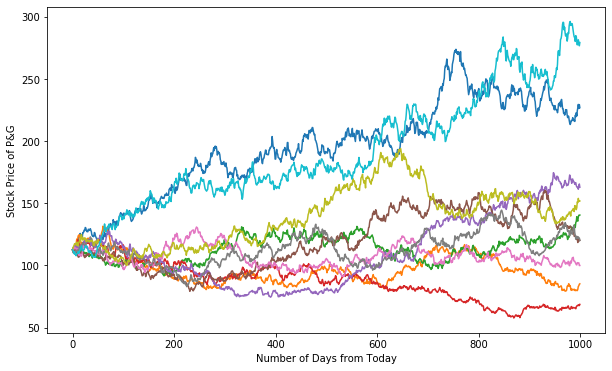

In [28]:
plt.figure(figsize=(10,6))
plt.plot(price_list);
plt.xlabel("Number of Days from Today")
plt.ylabel("Stock Price of P&G")